%run feature_engineering.ipynb

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.metrics import mean_squared_error


10MIN
30MIN
60MIN


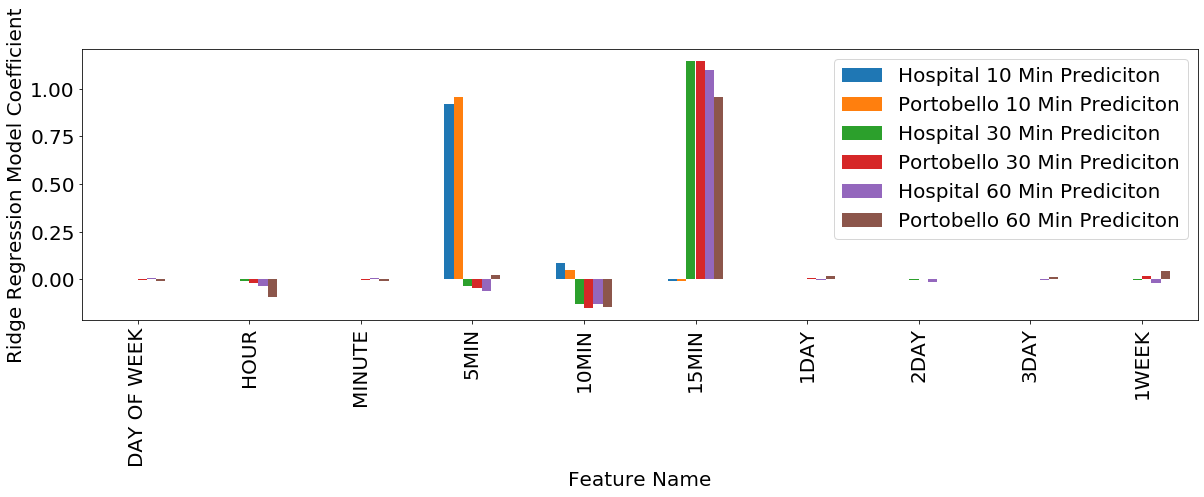

In [2]:
%run feature_engineering.ipynb

Lets save our variables from the previous notebook

In [3]:

df_hospital_map = df_hospital_map
df_portobello_map = df_portobello_map

X_hospital = X_hospital
y_portobello = y_portobello


In [4]:
def test_and_plot_model(model,df :pd.DataFrame, X, y, title:str):
    cv = TimeSeriesSplit(n_splits=5)

    
    mse_scores=[]
    split_count=0
    X = X.to_numpy()
    y = y.to_numpy()
    for train, test in cv.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse_scores.append(mean_squared_error(y[test], ypred))
        split_count=split_count+1
        if split_count == 5:
            plt.rc('font',size=30)
            plt.figure(figsize=(30,20))
            plt.scatter(df.iloc[test].index,y[test],label="actual",marker='o')
            plt.scatter(df.iloc[test].index,ypred,label="predicted")
            plt.xlim(df.iloc[test].index[0],df.iloc[test].index[-1])
            plt.legend()
            plt.xlabel("Time")
            plt.ylabel("Available Bikes")
            

    print("MSE: "+str(np.mean(mse_scores)))
    plt.title(title+" MSE: "+str(np.mean(mse_scores)))

In [8]:
df_hospital_map["10MIN"][700:710]

,BIKE STANDS,AVAILABLE BIKES,DAY OF WEEK,HOUR,MINUTE,5MIN,10MIN,15MIN,1DAY,2DAY,3DAY,1WEEK
TIME,,,,,,,,,,,,
2020-02-06 10:25:02,40,0.100,0.333333,0.434783,0.438596,0.100,0.100,0.100,0.200,0.10,0.0,0.075
2020-02-06 10:30:02,40,0.100,0.333333,0.434783,0.526316,0.100,0.100,0.100,0.200,0.10,0.0,0.050
2020-02-06 10:35:02,40,0.100,0.333333,0.434783,0.614035,0.100,0.100,0.100,0.200,0.05,0.0,0.050
2020-02-06 10:40:02,40,0.075,0.333333,0.434783,0.701754,0.075,0.100,0.100,0.175,0.05,0.0,0.025
2020-02-06 10:45:02,40,0.075,0.333333,0.434783,0.789474,0.075,0.075,0.100,0.150,0.05,0.0,0.025
2020-02-06 10:50:02,40,0.050,0.333333,0.434783,0.877193,0.050,0.075,0.075,0.150,0.05,0.0,0.025
2020-02-06 10:55:02,40,0.050,0.333333,0.434783,0.964912,0.050,0.050,0.075,0.125,0.05,0.0,0.025
2020-02-06 11:00:02,40,0.050,0.333333,0.478261,0.000000,0.050,0.050,0.050,0.125,0.05,0.0,0.025
2020-02-06 11:05:02,40,0.050,0.333333,0.478261,0.087719,0.050,0.050,0.050,0.125,0.05,0.0,0.000


MSE: 2.337791321941772e-05


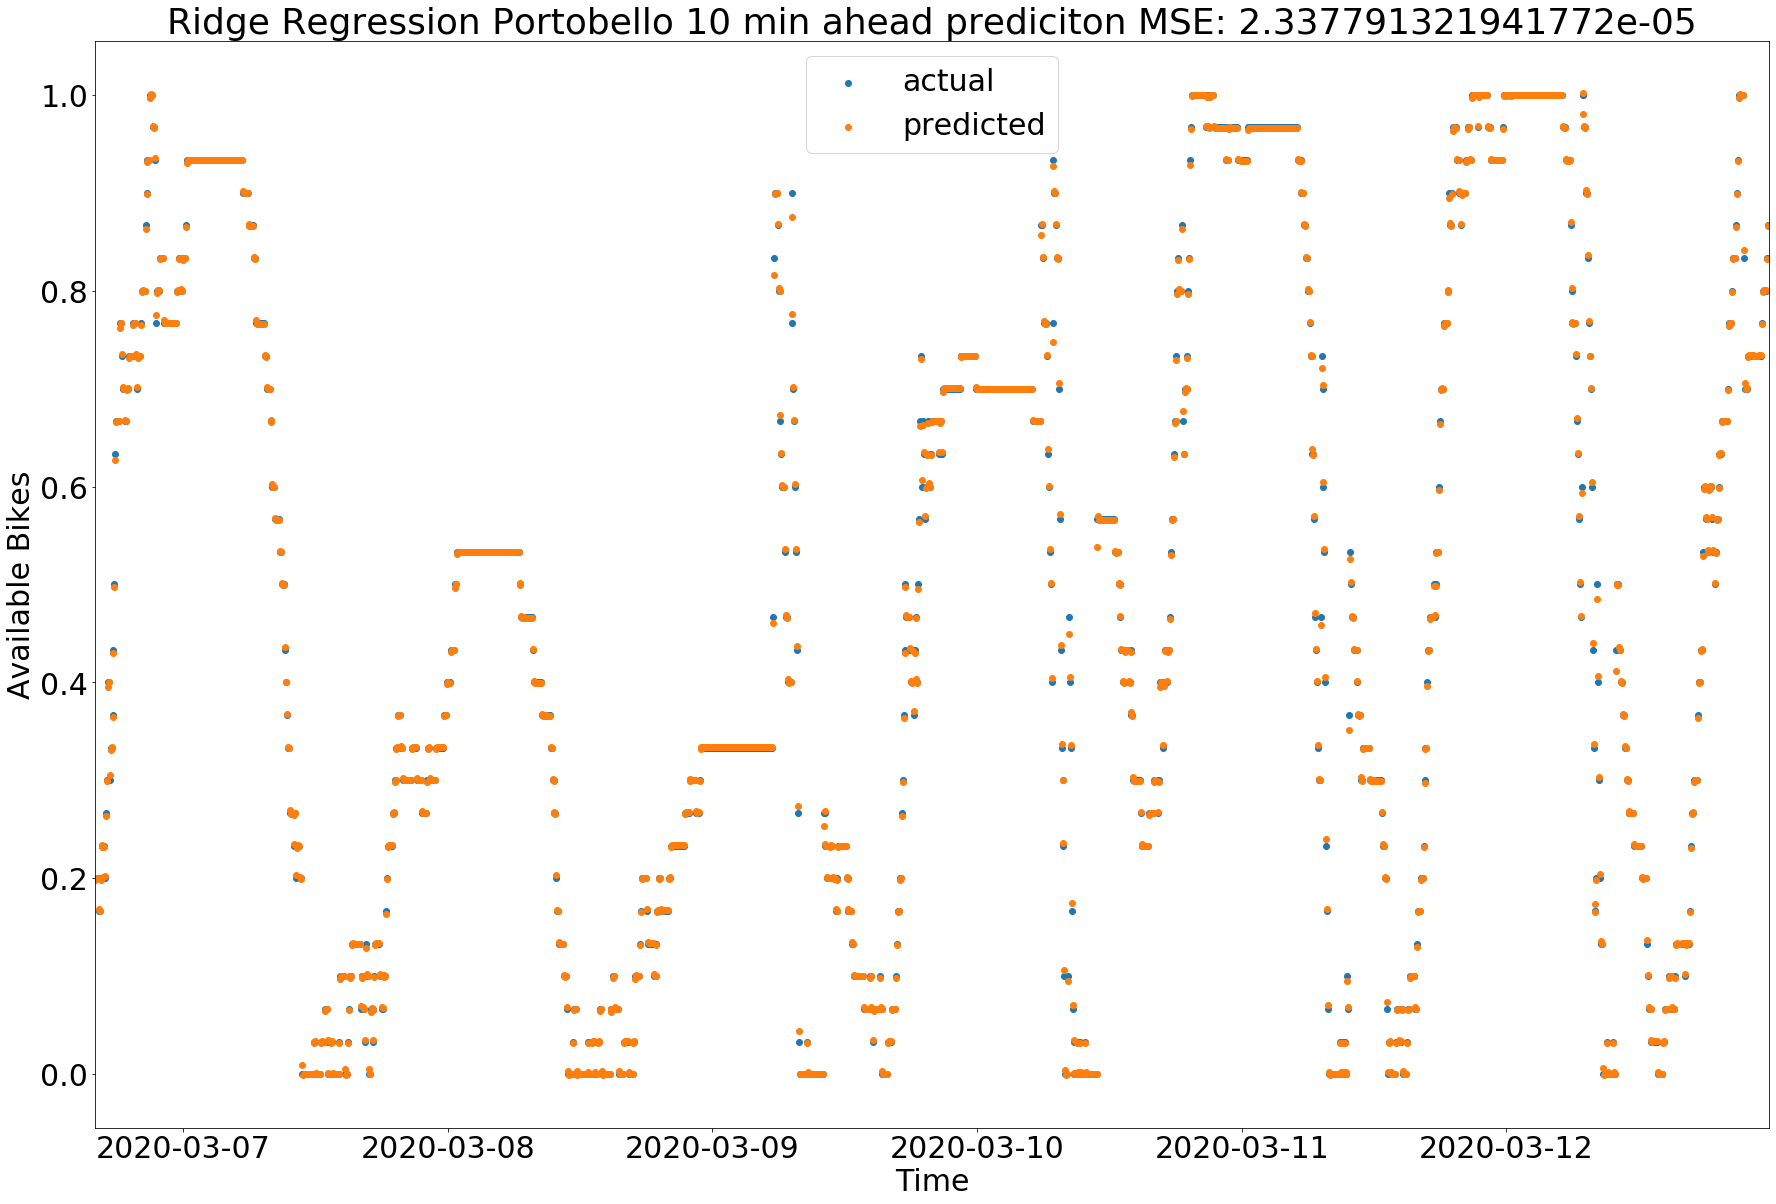

In [6]:

test_and_plot_model(Ridge(),df_portobello["10MIN"],X_portobello["10MIN"],y_portobello["10MIN"],"Ridge Regression Portobello 10 min ahead prediciton")
